In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df1 = pd.read_csv('./data/Time.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
new_cases = df1.diff()[1:].confirmed
df2 = pd.read_csv('./data/Policy.csv', index_col='start_date', parse_dates=True, infer_datetime_format=True).reset_index()
for i in range(-14,30):
    df2[i] = df2.apply(lambda x: new_cases[x.start_date+datetime.timedelta(days=i)] if (x.start_date+datetime.timedelta(days=i)) in new_cases.index else np.NaN, axis=1)
df2 = df2[[*tuple(range(-14,30))]+["type"]].groupby(by="type").mean().T

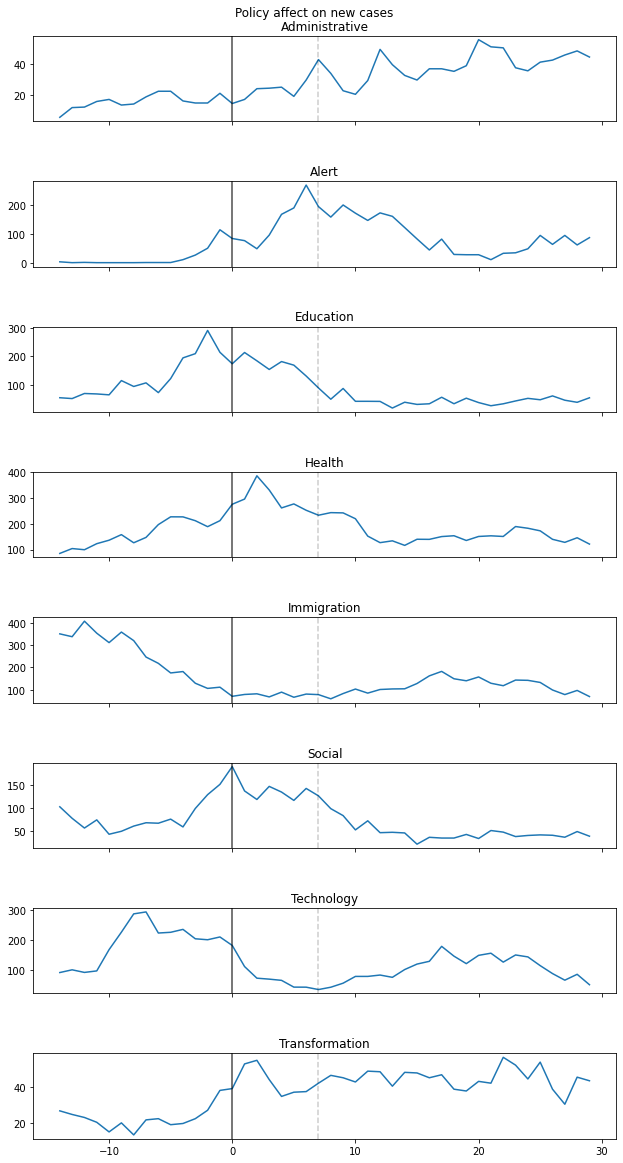

In [3]:
f, axarr = plt.subplots(8, sharex=True,figsize=(10, 17))
f.tight_layout(pad=5.0)
f.suptitle('Policy affect on new cases')
for i,c in enumerate(df2.columns):
    axarr[i].plot(df2.index, df2[[c]])
    axarr[i].set_title(c)
    axarr[i].axvline(x=0, ymin=0.0, ymax=1000.0, color='k', linestyle='-', alpha=0.7)
    axarr[i].axvline(x=7, ymin=0.0, ymax=1000.0, color='k', linestyle='--', alpha=0.2)
    